In [50]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1.Overview

In [51]:
df = pd.read_csv('./data/Billionaires Statistics Dataset.csv')
pd.options.display.float_format = '{:,.2f}'.format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [52]:
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype('float64')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.00,France,Paris,LVMH,Fashion & Retail,France,...,1.10,"2,715,518,274,227.00",65.60,102.50,82.50,24.20,60.70,"67,059,887.00",46.23,2.21
1,2,180000,Automotive,Elon Musk,51.00,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
2,3,114000,Technology,Jeff Bezos,59.00,United States,Medina,Amazon,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
3,4,107000,Technology,Larry Ellison,78.00,United States,Lanai,Oracle,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
4,5,106000,Finance & Investments,Warren Buffett,92.00,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71


In [53]:
def Overview(df, col_type):
    view = df.select_dtypes(include = col_type)
    summary = pd.DataFrame(view.dtypes, columns= ['type'])
    summary['missing'] = view.isnull().sum()
    summary['%missing'] = view.isnull().sum() / df.shape[0] * 100
    summary = pd.concat([summary,view.describe().T], axis= 1)
    summary = summary.drop(['count'], axis= 1)
    return summary

In [54]:
Overview(df, ['int64', 'float64'])

,type,missing,%missing,mean,std,min,25%,50%,75%,max
rank,int64,0,0.00,"1,289.16",739.69,1.00,659.00,"1,312.00","1,905.00","2,540.00"
finalWorth,int64,0,0.00,"4,623.79","9,834.24","1,000.00","1,500.00","2,300.00","4,200.00","211,000.00"
age,float64,65,2.46,65.14,13.26,18.00,56.00,65.00,75.00,101.00
birthYear,float64,76,2.88,"1,957.18",13.28,"1,921.00","1,948.00","1,957.00","1,966.00","2,004.00"
birthMonth,float64,76,2.88,5.74,3.71,1.00,2.00,6.00,9.00,12.00
birthDay,float64,76,2.88,12.10,9.92,1.00,1.00,11.00,21.00,31.00
cpi_country,float64,184,6.97,127.76,26.45,99.55,117.24,117.24,125.08,288.57
cpi_change_country,float64,184,6.97,4.36,3.62,-1.90,1.70,2.90,7.50,53.50
gdp_country,float64,164,6.21,"11,582,873,303,921.56","9,575,588,391,938.20","3,154,057,987.00","1,736,425,629,520.00","19,910,000,000,000.00","21,427,700,000,000.00","21,427,700,000,000.00"
gross_tertiary_education_enrollment,float64,182,6.89,67.23,21.34,4.00,50.60,65.60,88.20,136.60


In [55]:
Overview(df, ['object', 'bool'])

,type,missing,%missing,unique,top,freq
category,object,0,0.00,18,Finance & Investments,372
personName,object,0,0.00,2638,Wang Yanqing & family,2
country,object,38,1.44,78,United States,754
city,object,72,2.73,741,New York,99
source,object,0,0.00,906,Real estate,151
industries,object,0,0.00,18,Finance & Investments,372
countryOfCitizenship,object,0,0.00,77,United States,735
organization,object,2315,87.69,294,Meta Platforms,4
selfMade,bool,0,0.00,2,True,1812
status,object,0,0.00,6,D,1223


# 2.Preprocessing

In [56]:
df.drop(['organization', 'title', 'date', 'residenceStateRegion', 'firstName', 'state',
         'lastName'],axis= 1, inplace= True)

In [57]:
df['country'].fillna(df['countryOfCitizenship'], inplace=True)

In [58]:
mode_fill_col = ['age', 'birthDate', 'birthYear', 'birthMonth', 'birthDay']
for col in mode_fill_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [59]:
nan_col = df.isna().sum()
nan_col = nan_col[nan_col > 0]
for col in nan_col.index:
    for i in df['country'].unique():
        x = df[df['country'] == i]
        mode_value = x[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

In [60]:
df.isna().sum().sum()

0

In [61]:
df.duplicated().sum()

0

In [62]:
df['birthYear']=df['birthYear'].astype(int)
df['birthMonth']=df['birthMonth'].astype(int)
df['birthDay']=df['birthDay'].astype(int)

df['birthDate']=pd.to_datetime(df['birthDate'])

In [63]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.00,France,Paris,LVMH,Fashion & Retail,France,...,1.10,"2,715,518,274,227.00",65.60,102.50,82.50,24.20,60.70,"67,059,887.00",46.23,2.21
1,2,180000,Automotive,Elon Musk,51.00,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
2,3,114000,Technology,Jeff Bezos,59.00,United States,Medina,Amazon,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
3,4,107000,Technology,Larry Ellison,78.00,United States,Lanai,Oracle,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
4,5,106000,Finance & Investments,Warren Buffett,92.00,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71


# 3. Visualize

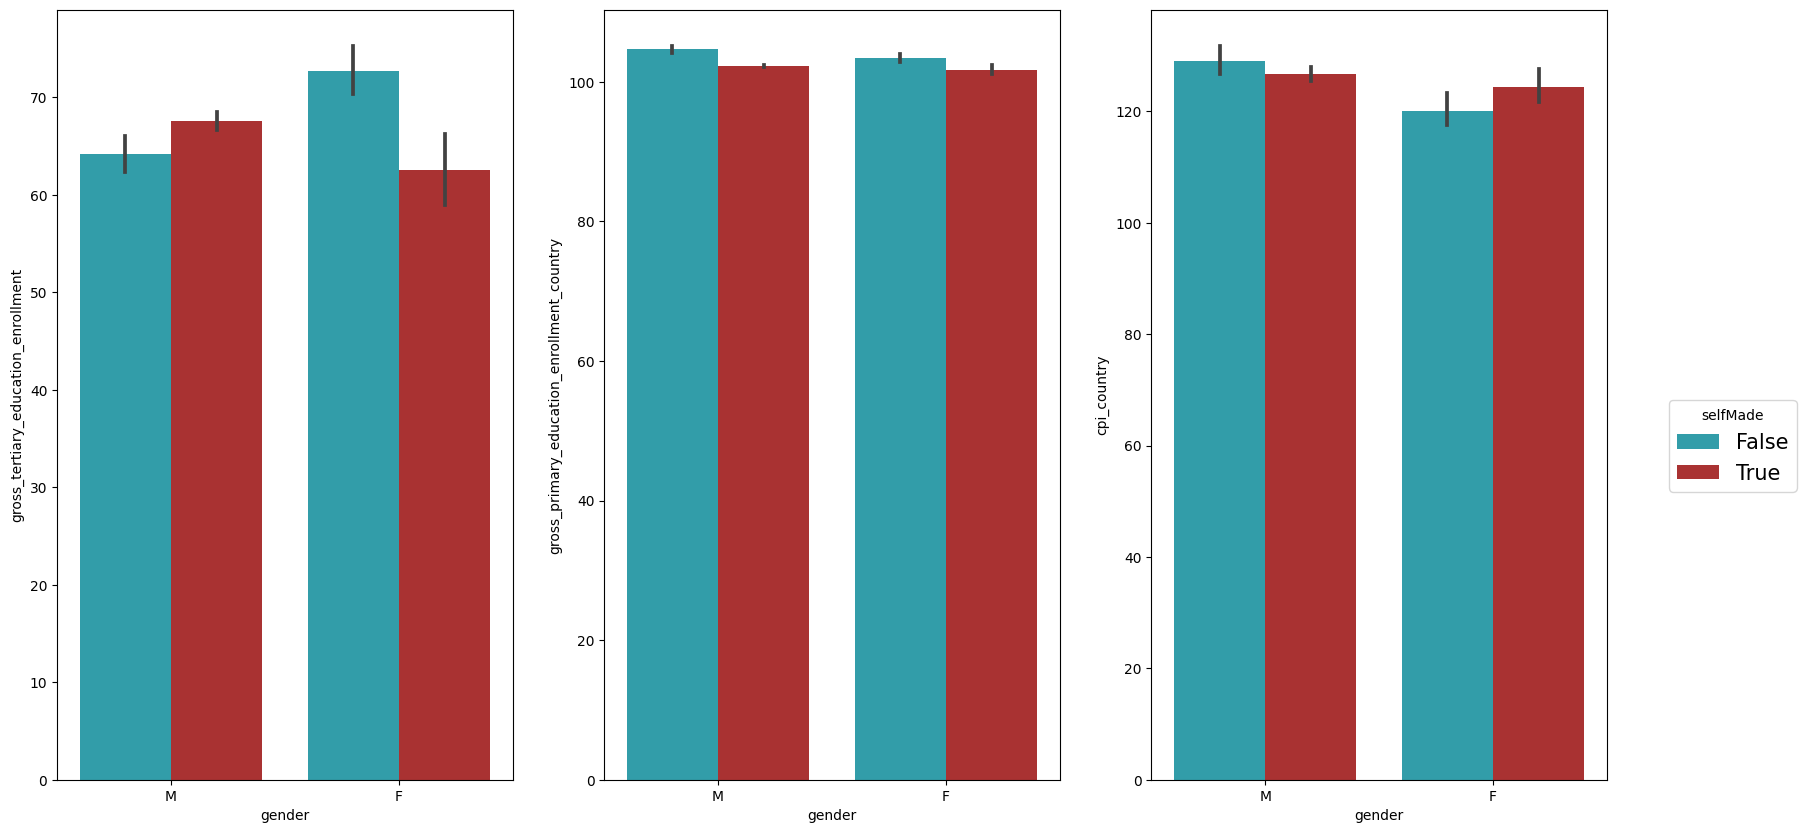

In [64]:
fig, axes = plt.subplots(1, 3, figsize = (20,10))
billion_env = ['gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'cpi_country']
labels = df['selfMade'].unique()

for i, col in enumerate(billion_env):
    sns.barplot(df, x= 'gender', y= col, ax = axes[i], hue='selfMade', palette= ['#1eadbd', '#bd1e1e'])
    h,l = axes[i].get_legend_handles_labels()
    if i == 0:
        legend = axes[i].get_legend()
        handles = legend.legend_handles
    axes[i].legend([], [], frameon=False)

fig.legend(handles, labels, bbox_to_anchor = (1,0.5), fontsize = 15, title = 'selfMade')

In [65]:
df[df['finalWorth'] < 150000]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2,3,114000,Technology,Jeff Bezos,59.00,United States,Medina,Amazon,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
3,4,107000,Technology,Larry Ellison,78.00,United States,Lanai,Oracle,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
4,5,106000,Finance & Investments,Warren Buffett,92.00,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
5,6,104000,Technology,Bill Gates,67.00,United States,Medina,Microsoft,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
6,7,94500,Media & Entertainment,Michael Bloomberg,81.00,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.00,China,Shanghai,Health clinics,Healthcare,China,...,2.90,"19,910,000,000,000.00",50.60,100.20,77.00,9.40,59.20,"1,397,715,000.00",35.86,104.20
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.00,United States,Pottsville,Beer,Food & Beverage,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
2637,2540,1000,Manufacturing,Zhang Gongyun,60.00,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.90,"19,910,000,000,000.00",50.60,100.20,77.00,9.40,59.20,"1,397,715,000.00",35.86,104.20
2638,2540,1000,Real Estate,Zhang Guiping & family,71.00,China,Nanjing,Real estate,Real Estate,China,...,2.90,"19,910,000,000,000.00",50.60,100.20,77.00,9.40,59.20,"1,397,715,000.00",35.86,104.20


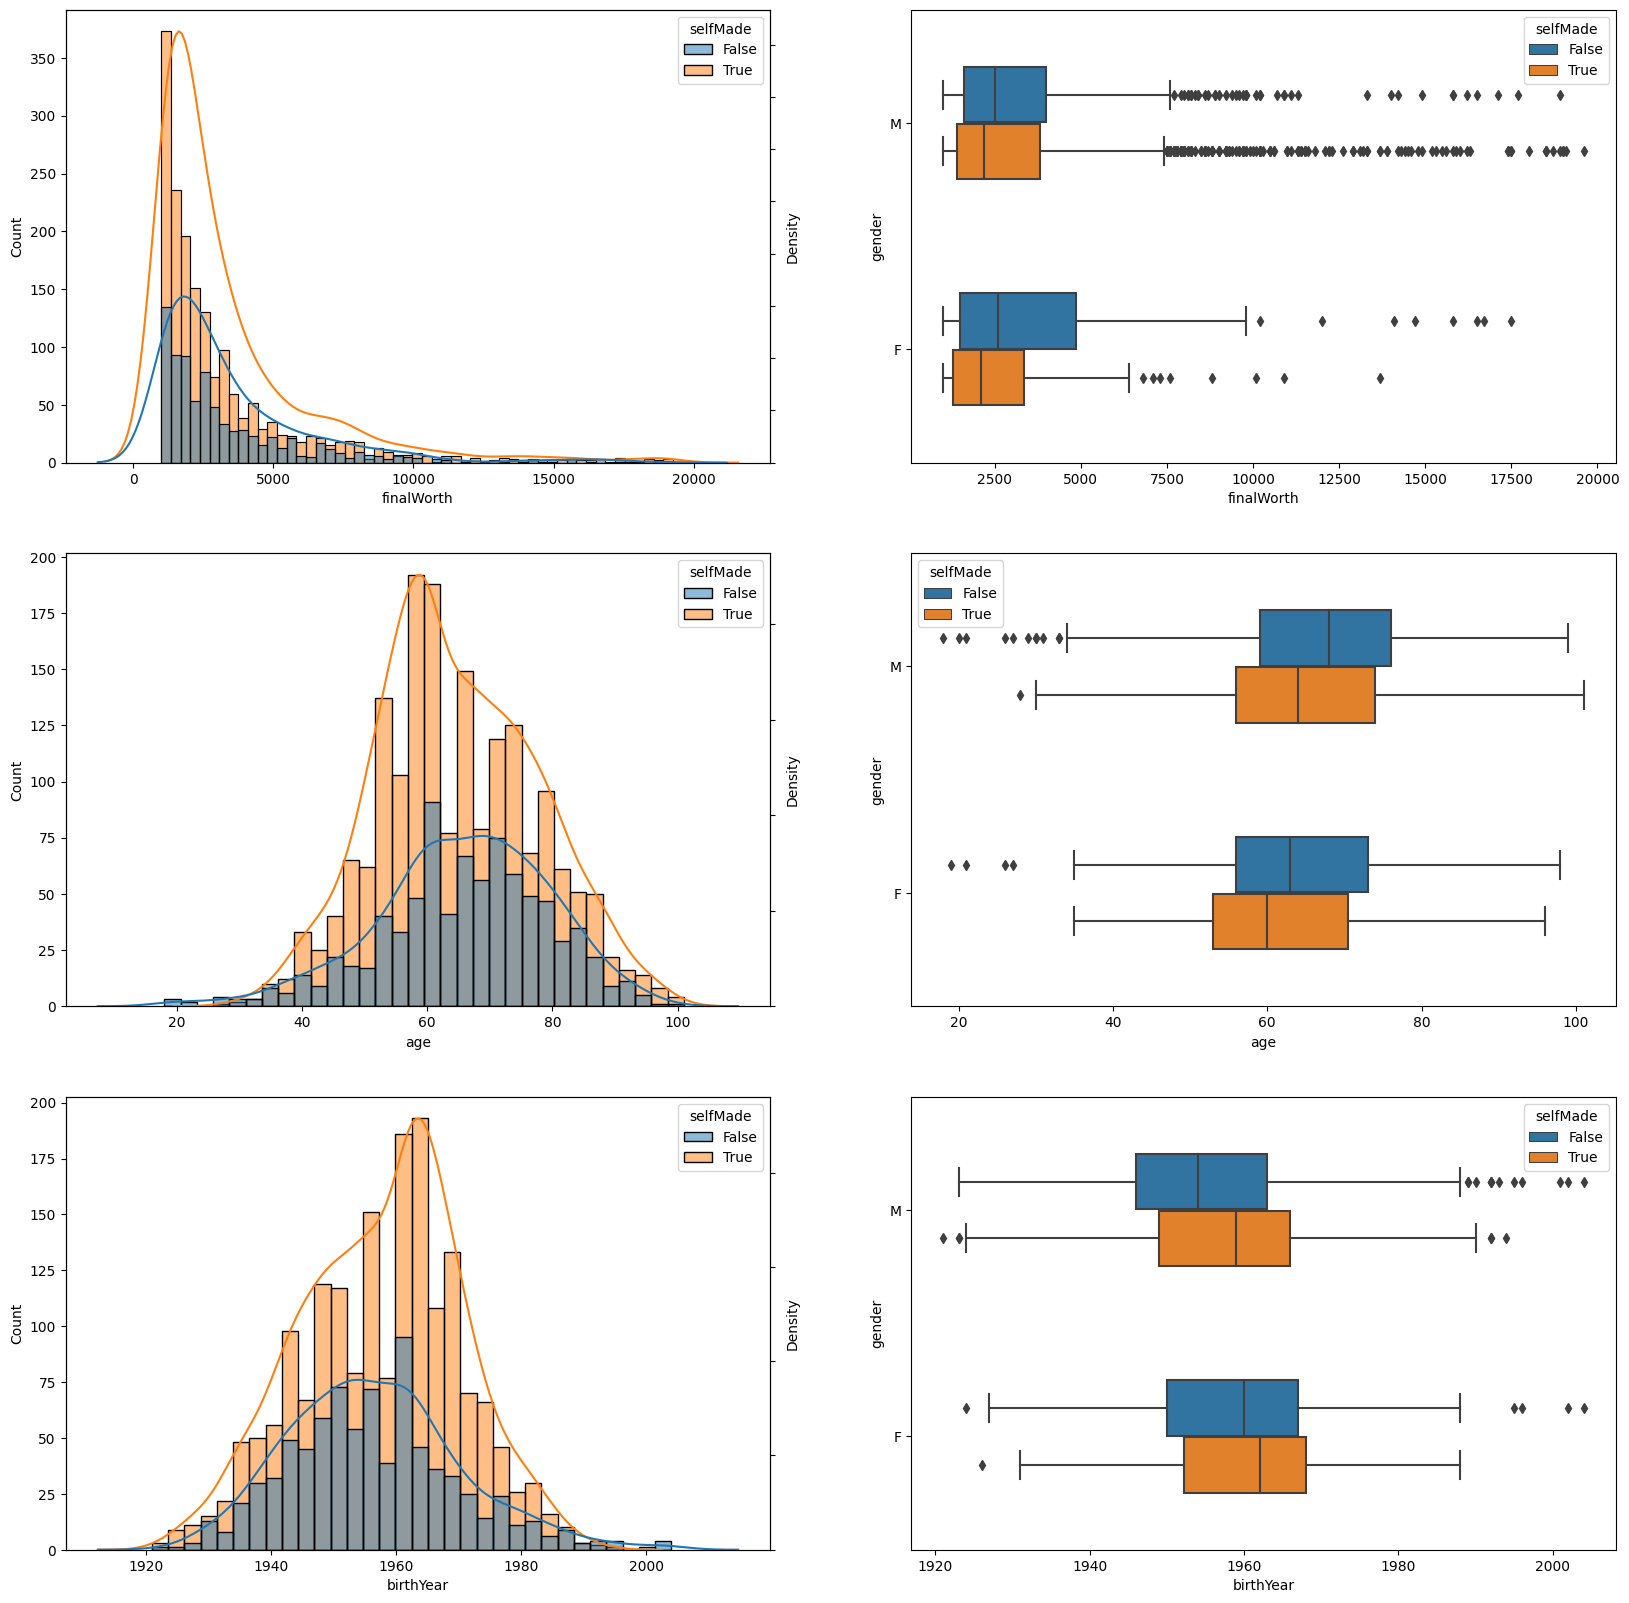

In [66]:
wealth_col = ['finalWorth', 'age', 'birthYear']
limit = [20000, 1000000, 1000000]
fig, axes = plt.subplots(3, 2, figsize = (20, 20))

for i, col in enumerate(wealth_col):
    sns.histplot(df[df['finalWorth'] < limit[i]], x = col, hue='selfMade', ax= axes[i][0])
    axes1 = axes[i][0].twinx()
    sns.kdeplot(df[df['finalWorth'] < limit[i]], x = col, hue='selfMade', ax= axes1)
    axes1.legend([], [], frameon = False)
    axes1.set_yticklabels([])
    sns.boxplot(df[df['finalWorth'] < limit[i]], x = col, y = 'gender', hue= 'selfMade', ax = axes[i][1], width=.5)



In [106]:
fig = px.treemap(df, path = ['industries', 'country'], values= 'finalWorth')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=25, l=0, r=0, b=0))
fig.show()